In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import cv2
import os
import pandas as pd

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
def load_cifar10_classes(classes):
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    # Filter the dataset to include only the specified classes
    train_indices = [i for i, label in enumerate(y_train) if label in classes]
    test_indices = [i for i, label in enumerate(y_test) if label in classes]
    
    x_train_filtered = x_train[train_indices]
    y_train_filtered = y_train[train_indices]
    x_test_filtered = x_test[test_indices]
    y_test_filtered = y_test[test_indices]
    
    return (x_train_filtered, y_train_filtered), (x_test_filtered, y_test_filtered)

# Specify the classes to include
classes = [1, 3, 5]  # Automobiles, Cats, Dogs

# Load CIFAR-10 dataset for the specified classes
(x_train_filtered, y_train_filtered), (x_test_filtered, y_test_filtered) = load_cifar10_classes(classes)

# Print the length of the dataset
print("Number of automobile, cat, and dog images:", len(x_train_filtered) + len(x_test_filtered))

Number of automobile, cat, and dog images: 18000


In [6]:
# Preprocess the image data
x_train = x_train_filtered / 255.0
x_test = x_test_filtered / 255.0

# Create a mapping dictionary for label conversion
label_mapping = {1: 0, 3: 1, 5: 2}

# Map the original labels to consecutive indices
y_train_mapped = np.array([label_mapping[label.item()] for label in y_train_filtered])
y_test_mapped = np.array([label_mapping[label.item()] for label in y_test_filtered])

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train_mapped, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test_mapped, num_classes=3)

In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Save the trained model
model.save('trained_model.h5')

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6864 - accuracy: 0.6505 - val_loss: 0.5487 - val_accuracy: 0.7390
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5237 - accuracy: 0.7447 - val_loss: 0.5307 - val_accuracy: 0.7387
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4827 - accuracy: 0.7697 - val_loss: 0.4720 - val_accuracy: 0.7793
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4554 - accuracy: 0.7872 - val_loss: 0.4681 - val_accuracy: 0.7803
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4228 - accuracy: 0.8025 - val_loss: 0.4571 - val_accuracy: 0.7927
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3942 - accuracy: 0.8214 - val_loss: 0.4685 - val_accuracy: 0.7817
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3641 - accuracy: 0.8367 - val_loss: 0.4761 - val_accuracy: 0.7907

In [8]:
# Map the class indices to their corresponding labels
class_labels = {0: 'Automobile', 1: 'Cat', 2: 'Dog'}

# Specify the folder path containing the images
folder_path = 'D:\Code\AI\CNN-ComputerVision\sample'

In [9]:
# Function to read and preprocess images from a folder
def read_images_from_folder(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (32, 32))
            image = image / 255.0
            image_list.append(image)
    return image_list

# Read and preprocess images from the folder
images = read_images_from_folder(folder_path)

# Load the trained model
model = tf.keras.models.load_model('trained_model.h5')

1/1 [==============================] - 0s 14ms/step


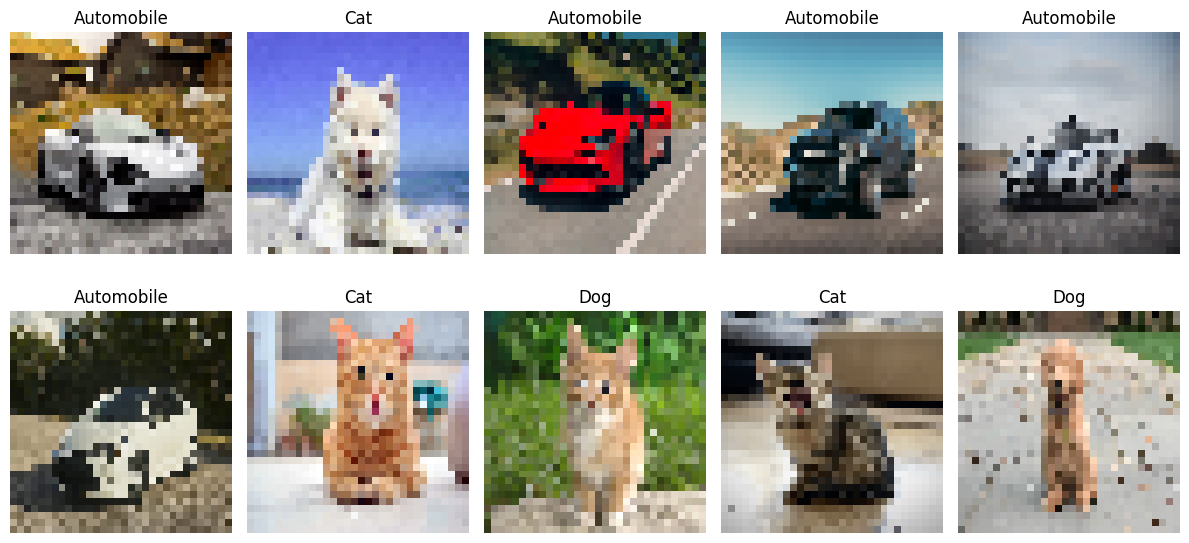

In [10]:
# Perform classification on the images
predicted_labels = []
plt.figure(figsize=(12, 6))
for i, image in enumerate(images):
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    class_index = np.argmax(prediction)
    predicted_label = class_labels[class_index]
    predicted_labels.append(predicted_label)
    
    # Display the image and its predicted class
    plt.subplot(2, 5, i+1)
    plt.imshow(image[0])
    plt.title(predicted_label)
    plt.axis('off')

plt.tight_layout()
plt.show()

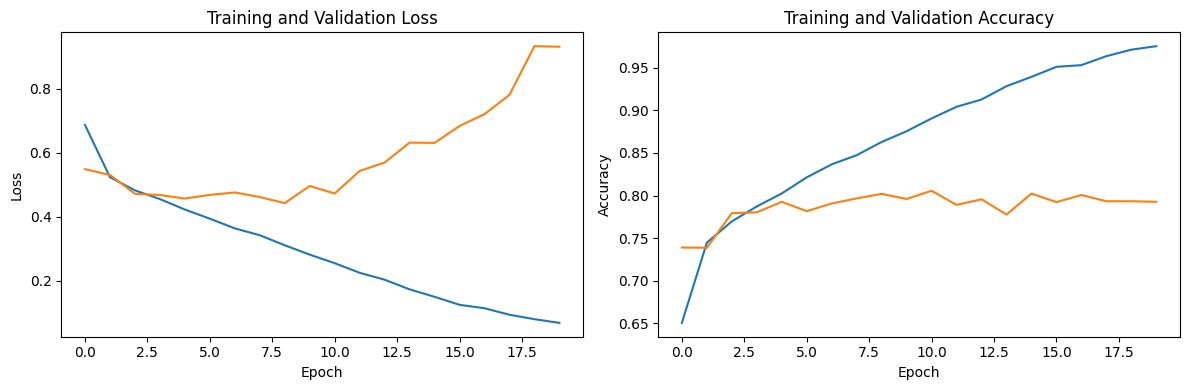

In [11]:
# Create a DataFrame from the history
history_frame = pd.DataFrame(history.history)

# Plot the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()